##### What is PCA?
Principal Component Analysis (or PCA) is a dimensionality reduction technique. We can use it to transform a large set of variables into a smaller set whilst preserving as much information as possible. In other words, we try to capture the essence of the data with fewer variables.

We use Principal Component Analysis to perform dimensionality reduction. PCA uses a technique called Singular Value Decomposition.

##### Why do we need it?

You may wonder why we need to reduce the number of variables at all. Why not just use all of the variables?

    A smaller number of variables is easier to work with and can be processed faster.
    It can be used to reduce noise in the data, i.e. dimensions which add little to the explanation of the underlying data.
    It is also easier to visualise data when we have fewer dimensions (visualising two dimensions is easier than visualising 10 dimensions). 

##### Using the PCA results

Once we have transformed our data using PCA we have a number of principal components, PC1, PC2, all the way up to PCn.  The aim of PCA is to reduce the number of dimensions.  Because the dimensions are ordered by their ability to capture the essence or variance in the data, we can keep the first few and throw away those at the end that don't add much to our understanding of the variance of the data.

#### Carryout PCA

##### Import Libraries

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import functions
from functions import *

##### Loading and cleaning data

In [2]:
# Load the data from the csv into Pandas Dataframe
original_data = pd.read_csv("./data/world_university_rankings_2016.csv",index_col="university_name")
original_data.head()

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,,,,
California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0


In [3]:
# Filter he data & extract columns of interest:
X = original_data[['teaching','international','research','citations','income','total_score','num_students','student_staff_ratio','international%','female%','male%']]
X.head()

,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,,
California Institute of Technology,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
University of Oxford,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
Stanford University,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, California Institute of Technology to Yuan Ze University
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             800 non-null    float64
 1   international        800 non-null    float64
 2   research             800 non-null    float64
 3   citations            800 non-null    float64
 4   income               763 non-null    float64
 5   total_score          200 non-null    float64
 6   num_students         793 non-null    float64
 7   student_staff_ratio  793 non-null    float64
 8   international%       790 non-null    float64
 9   female%              736 non-null    float64
 10  male%                736 non-null    float64
dtypes: float64(11)
memory usage: 75.0+ KB


In [5]:
original_data.describe().T.style.background_gradient(cmap='pink_r')

,count,mean,std,min,25%,50%,75%,max
world_rank,800.000000,356.611250,193.900379,1.000000,200.750000,351.000000,526.000000,601.000000
teaching,800.000000,31.584000,14.985400,9.900000,21.000000,27.000000,37.500000,95.600000
international,800.000000,48.500375,23.690816,7.100000,29.450000,45.700000,65.450000,99.900000
research,800.000000,28.128625,19.532270,2.900000,14.350000,22.100000,35.525000,99.000000
citations,800.000000,51.309750,27.045440,1.200000,27.525000,50.300000,74.900000,100.000000
income,763.000000,46.869594,20.576165,28.000000,31.600000,38.600000,55.250000,100.000000
total_score,200.000000,62.520000,12.040555,48.800000,52.900000,57.950000,69.625000,95.200000
num_students,793.000000,24161.264817,22569.224842,462.000000,12331.000000,20174.000000,29700.000000,379231.000000
student_staff_ratio,793.000000,19.116393,12.522003,0.600000,12.300000,16.600000,22.400000,162.600000
international%,790.000000,12.702532,10.676075,0.000000,5.000000,10.000000,18.000000,82.000000


C:\Users\dipesh.gandhi\AppData\Local\Temp\ipykernel_26260\3403269216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['total_score'],fit=norm,color="r")


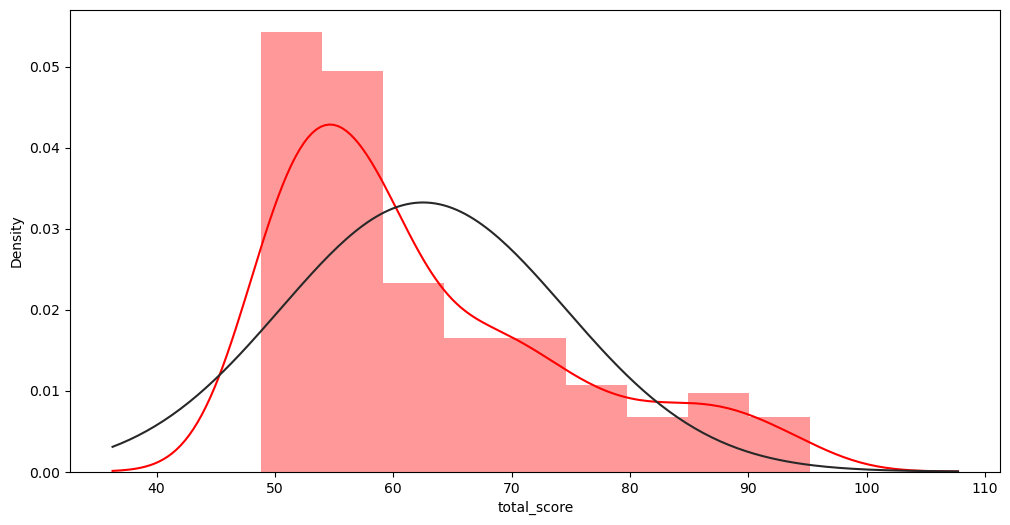

In [6]:
# Check for Skewness
plt.figure(figsize=(12,6))
sns.distplot(X['total_score'],fit=norm,color="r")
plt.show()

In [7]:
# Replace nulls with mean values for the variables
X = X.fillna(X.mean())

C:\Users\dipesh.gandhi\AppData\Local\Temp\ipykernel_26260\3403269216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['total_score'],fit=norm,color="r")


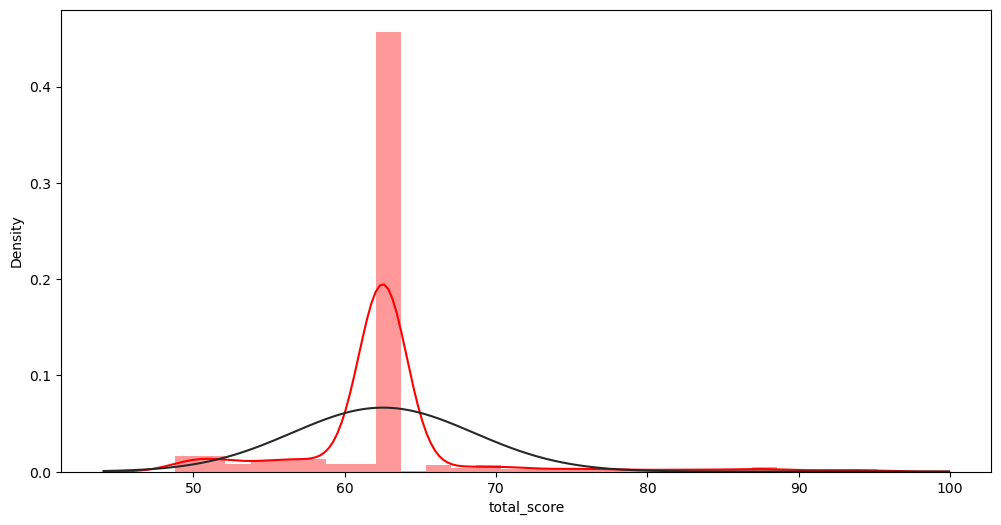

In [8]:
# Check for Skewness
plt.figure(figsize=(12,6))
sns.distplot(X['total_score'],fit=norm,color="r")
plt.show()

In [9]:
print("Skew of data: %f" % X['total_score'].skew())
print("Kurtosis of data: %f" % kurtosis(X['total_score'], fisher= False))

Skew of data: 2.023164
Kurtosis of data: 12.160055


In [10]:
X.drop('total_score',axis=1,inplace=True)

##### Standardising the data 

In [11]:
# Check the range of values for selected variables
X.describe().T.style.background_gradient(cmap='pink_r')

,count,mean,std,min,25%,50%,75%,max
teaching,800.000000,31.584000,14.985400,9.900000,21.000000,27.000000,37.500000,95.600000
international,800.000000,48.500375,23.690816,7.100000,29.450000,45.700000,65.450000,99.900000
research,800.000000,28.128625,19.532270,2.900000,14.350000,22.100000,35.525000,99.000000
citations,800.000000,51.309750,27.045440,1.200000,27.525000,50.300000,74.900000,100.000000
income,800.000000,46.869594,20.094099,28.000000,31.800000,39.900000,53.700000,100.000000
num_students,800.000000,24161.264817,22470.143414,462.000000,12344.000000,20307.000000,29640.500000,379231.000000
student_staff_ratio,800.000000,19.116393,12.467030,0.600000,12.300000,16.850000,22.225000,162.600000
international%,800.000000,12.702532,10.609056,0.000000,5.000000,10.000000,18.000000,82.000000
female%,800.000000,49.538043,11.473152,1.000000,46.000000,51.000000,56.000000,100.000000
male%,800.000000,50.461957,11.473152,0.000000,44.000000,49.000000,54.000000,99.000000


In [12]:
# Apply the standard scaler:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

In [13]:
pd.DataFrame(X_scaled,columns=X.columns).describe().T.style.background_gradient(cmap='pink_r')

,count,mean,std,min,25%,50%,75%,max
teaching,800.000000,0.000000,1.000626,-1.447914,-0.706729,-0.306089,0.395031,4.274564
international,800.000000,-0.000000,1.000626,-1.748622,-0.804628,-0.118279,0.715899,2.170959
research,800.000000,-0.000000,1.000626,-1.292446,-0.705870,-0.308843,0.378912,3.630695
citations,800.000000,-0.000000,1.000626,-1.853958,-0.879987,-0.037359,0.872791,1.801439
income,800.000000,0.000000,1.000626,-0.939649,-0.750420,-0.347065,0.340134,2.645734
num_students,800.000000,-0.000000,1.000626,-1.055360,-0.526239,-0.171636,0.243998,15.811731
student_staff_ratio,800.000000,-0.000000,1.000626,-1.486158,-0.547096,-0.181905,0.249502,11.516244
international%,800.000000,0.000000,1.000626,-1.198078,-0.726488,-0.254898,0.499647,6.536003
female%,800.000000,0.000000,1.000626,-4.233223,-0.308569,0.127504,0.563577,4.401016
male%,800.000000,-0.000000,1.000626,-4.401016,-0.563577,-0.127504,0.308569,4.233223


<Axes: ylabel='Density'>

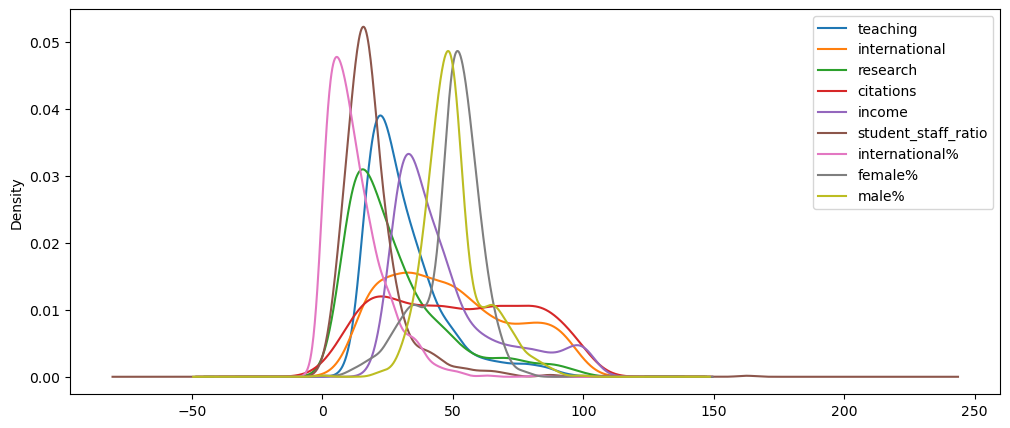

In [14]:
# Polt data before scaling:
X1 = pd.DataFrame(X,columns=X.columns)
X1.drop('num_students',axis=1,inplace=True)
X1.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

<Axes: ylabel='Density'>

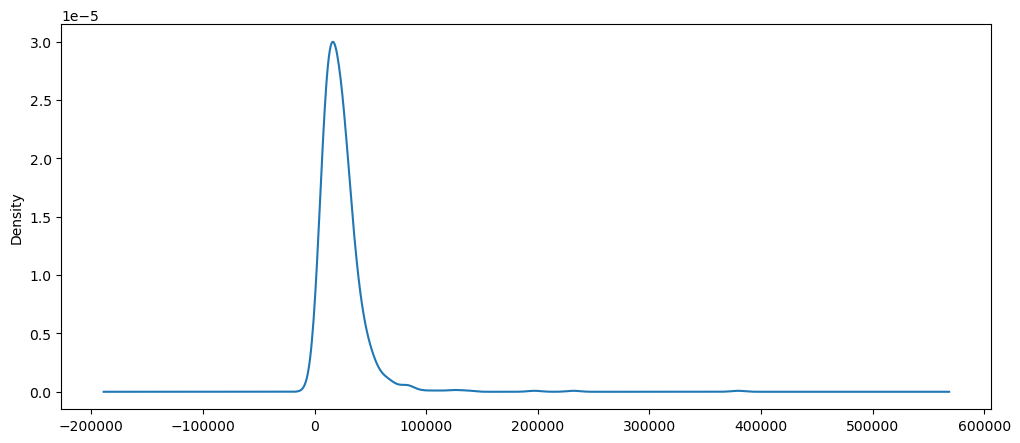

In [15]:
X2 = pd.DataFrame(X,columns=X.columns)['num_students']
X2.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

<Axes: ylabel='Density'>

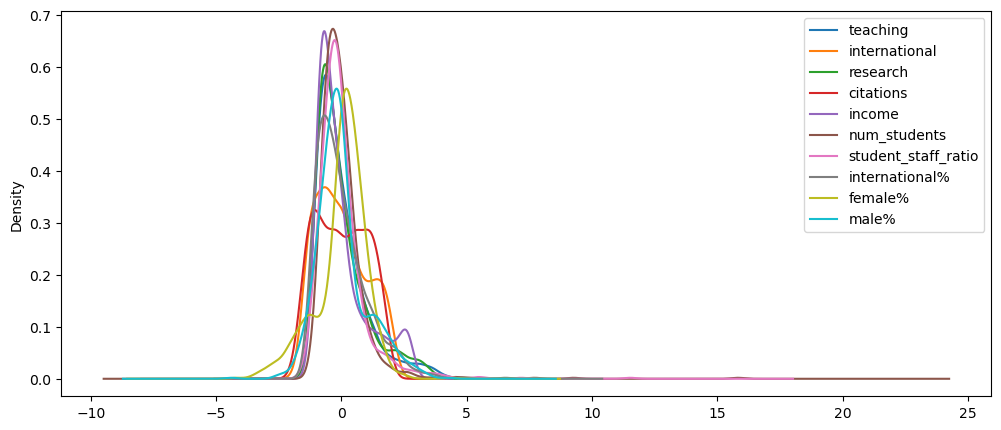

In [16]:
pd.DataFrame(X_scaled,columns=X.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

##### Perform PCA

In [17]:
# Perform a PCA on our standardised data:
# Select the number of principal components we will return
num_components = 10

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)

PCA(n_components=10)

##### Analyse the results

##### Explained Variance Ratio

In [18]:
# Array of the variance of the data explained by each of the 10 principal components, starting with PC1, the principal component that explains most of the variance.
pca.explained_variance_ratio_.round(2)

array([0.32, 0.24, 0.16, 0.11, 0.07, 0.05, 0.04, 0.01, 0.01, 0.  ])

In [20]:
# Express the explained variance ratio as a cumulative sum:
pca.explained_variance_ratio_.cumsum()

array([0.32137189, 0.55846173, 0.71406204, 0.81941309, 0.88869897,
       0.94340395, 0.97860961, 0.99320312, 1.        , 1.        ])

##### Scree Plot

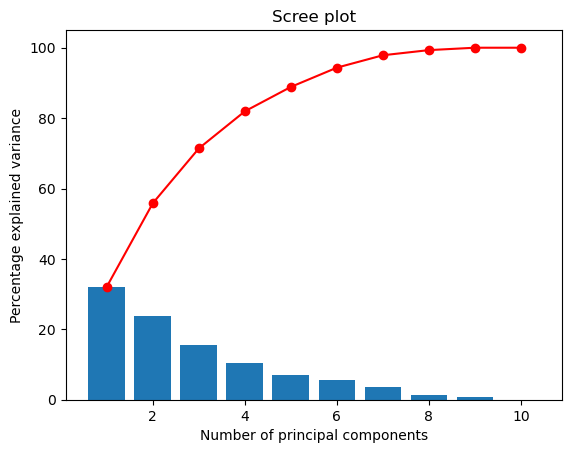

In [21]:
# The explained variance ratio in a scree plot.
display_scree_plot(pca) 

##### Component Scores

Each array, pc1, pc2, etc has one value or 'score' for each variable. The score shows how much the variable influences the principal component. 

In [22]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]


In [23]:
X.columns

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international%', 'female%',
       'male%'],
      dtype='object')

In [25]:
pc1

array([ 0.44602246,  0.41763286,  0.47918623,  0.4372045 ,  0.17746079,
       -0.06111775, -0.0565289 ,  0.39562507,  0.07394972, -0.07394972])

In [26]:
pc2

array([-0.17388542,  0.17493695, -0.14625   ,  0.0530956 , -0.28297188,
        0.2070367 ,  0.21899687,  0.09335706,  0.60635809, -0.60635809])

In [27]:
pc3

array([ 0.18617554, -0.22930468,  0.24048589,  0.01055502,  0.37071004,
        0.60934077,  0.52432033, -0.26675198, -0.00336353,  0.00336353])

##### Correlation Circle
We can plot these component scores on a correlation circle (sometimes called a variables factor map) chart to make them easier to digest. Each plot is drawn on a factorial plane, that is the vector space made up of the intersection of two of the principal components.

Plot these component scores on a correlation circle - PC1 against PC2:


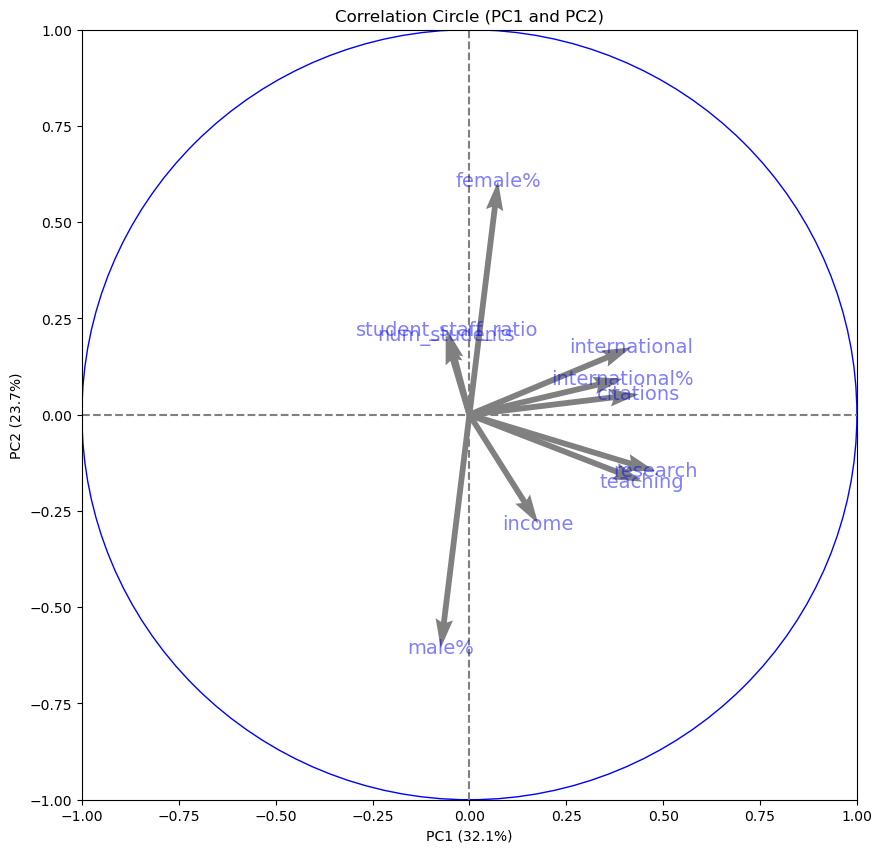

In [28]:
# Generate a correlation circle
pcs = pca.components_
display_circles(pcs, num_components, pca, [(0,1)], labels= np.array(X.columns))

    A small angle indicates that the representation of the two variables on the factorial plane are positively correlated. Above we see that teaching and research are positively correlated on this factorial plane.

    An angle of 90 degrees indicates no correlation.  Above we can see that international and num_students have little correlation on this factorial plane.

    An angle of 180 degrees indicates a negative correlation.  So male% and female% are strongly negatively correlated on this factorial plane.

PC2 against PC3:

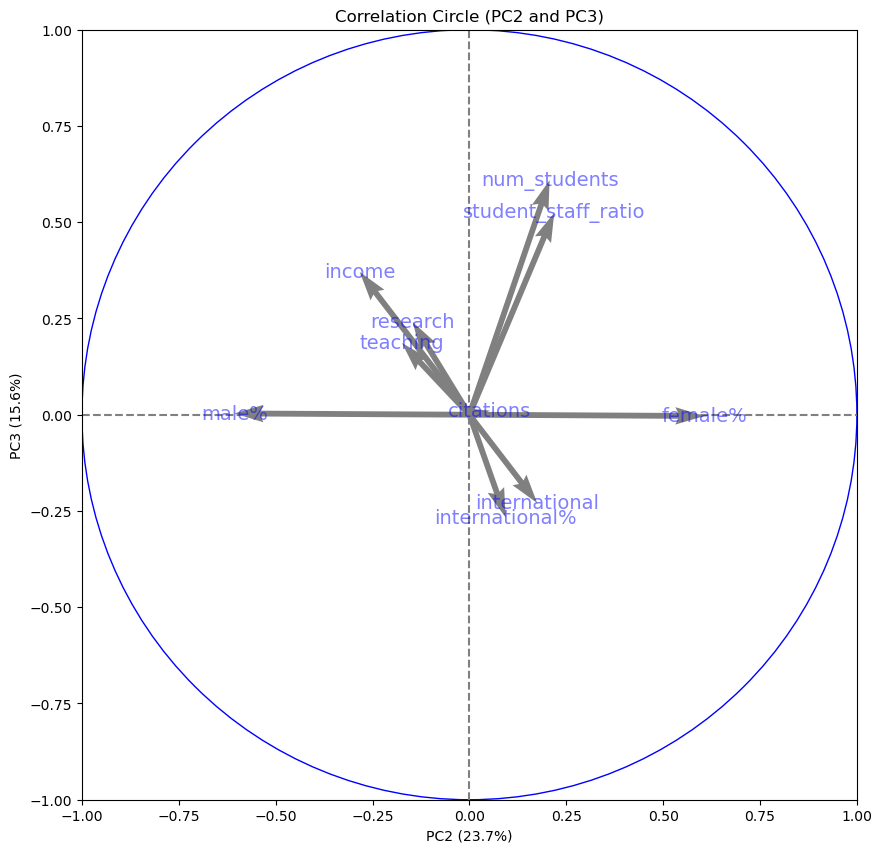

In [29]:
display_circles(pcs, num_components, pca, [(1,2)], labels=np.array(X.columns))

##### Individuals Factor Map
We can also plot our samples on a scatter plot in the new factorial planes. We will do this to show that the principal components found with this unsupervised approach have value as representative components of the original data.

Plot our samples on a scatter plot in the new factorial planes.

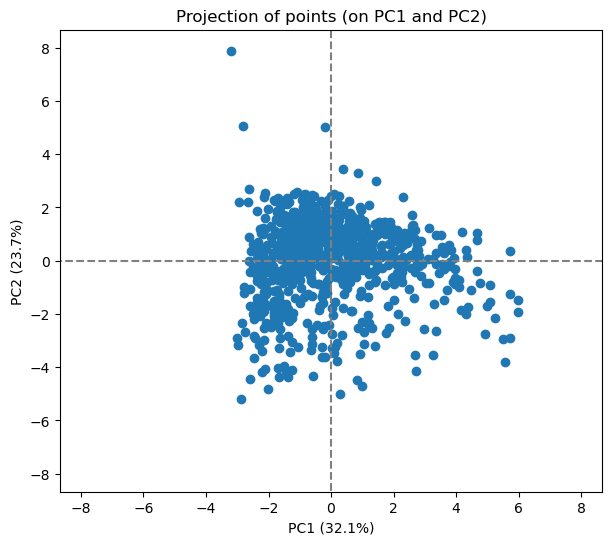

In [31]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(X_scaled)

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)])

In [32]:
# Band the data into the top 10, top 100 and top 1000 universities:

# Take a copy of the data an add a new column for the banding
classed_data = original_data.copy()
append_class(classed_data, 'rank_band','world_rank',[0,11,101,1000],['10','100','1000'])

# Get a list of the new bandings that we can pass to the plot
classed_data = classed_data.reset_index()
rank_band = [classed_data.loc[uni_id, "rank_band"] for uni_id in range(0,len(X_scaled))]

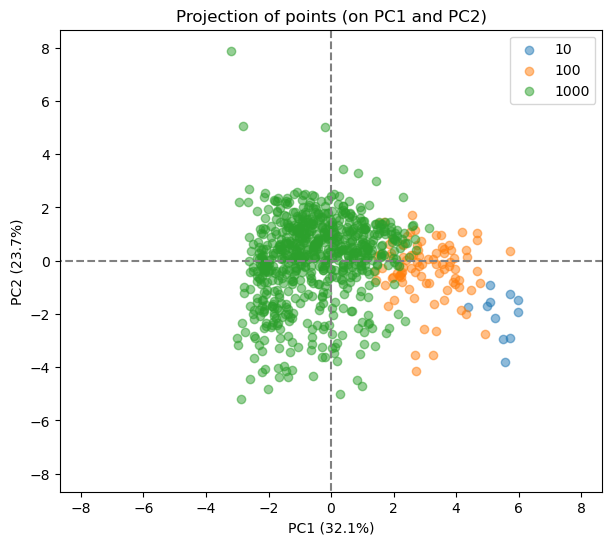

In [33]:
# Plot the samples again, this time showing the bands as separate colours:

# Transform the original scaled data to the new vector space and display data points
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, num_components, pca, [(0,1)], illustrative_var = rank_band, alpha = 0.5)

Remember that PCA carried this out with an unsupervised approach. It knew nothing about the rankings beforehand but has found the optimal plane through the data which happens to separate out the top universities quite nicely.

Factor maps for other factorial planes:

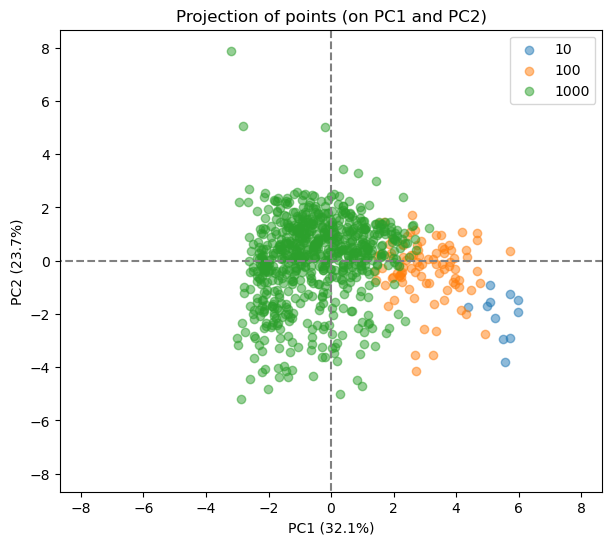

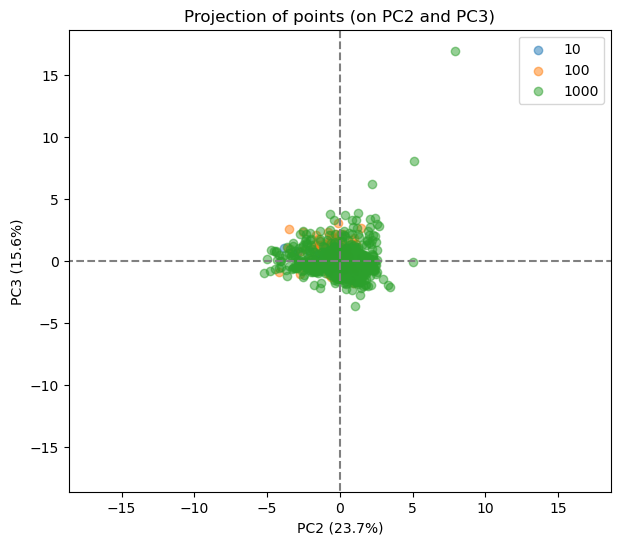

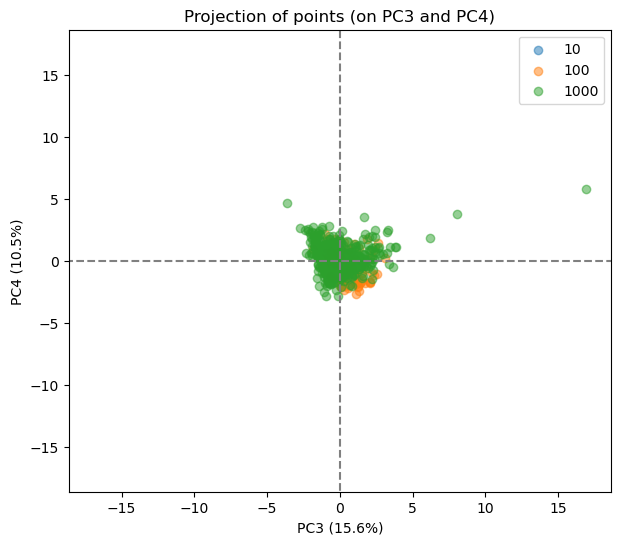

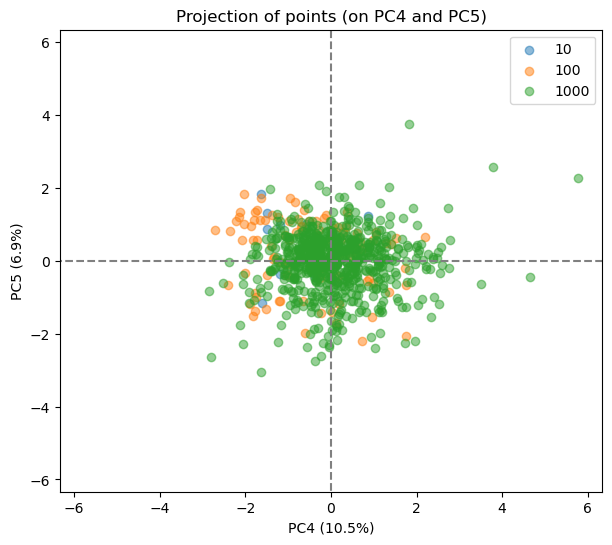

In [37]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, num_components, pca, [(0,1),(1,2),(2,3),(3,4)], illustrative_var = rank_band, alpha = 0.5)